<!-- Badges: -->

<!-- Title: -->
<div align="center">
  <h1><b> State Preparation </b></h1>
  <h2> Quantum Circuit Theory and Implementations </h2>
</div>
<br>

<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

<div align='center'>
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/quantum-circuit-theory"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>
</div>

# Table of Contents

- Introduction
- Unitary Decomposition
- Schmidt Decomposition
- Qiskit Examples

# Introduction

Quantum state preparation consists of finding a unitary matrix $\hat{U}$ such that acting on an initial state $|0\rangle^{\otimes n} = [1,0,0,…,0]$ produces the intended target state $|\psi \rangle$. This operation can be represented by:

$$ |\psi \rangle = \hat{U} |0 \rangle^{\otimes n} = (\alpha_1, . . . , \alpha_N).$$

One possible choice for $\hat{U}$ is such that the first column of $\hat{U}$ corresponds to the state vector $∣\psi\rangle$, while the remaining columns are chosen in such a way as to make the matrix unitary:

$$ 
\hat{U} = \begin{bmatrix}
 \alpha_0 & * & * & \cdots \\
 \alpha_1 & * & * & \cdots \\
 \vdots   & \vdots & \vdots & \ddots \\
 \alpha_{2^{n-1}} & * & * & \cdots
\end{bmatrix}
$$

Implementation via quantum circuits requires this matrix to be decomposed into a sequence of unitary quantum gates that are available in the quantum hardware. For example, on the IBM platform, at the software level, the sequence of finite universal gates (Clifford+T) is ${H, S, CNOT, T}$. While the sequence of continuous universal gates is: ${R_x(\theta), R_y(\theta), R_z(\theta), P(\lambda), CNOT}$. However, fault-tolerant implementation of these gates must be accomplished with native hardware-level gates. IBM's native gates are: $CNOT, \sqrt{CNOT}, R_x(\theta), R_y(\theta), R_z(\theta)$.  

# Unitary Decomposition

A well-known decomposition for 1-qubit unitary matrices is the Z-Y decomposition (Ref [1], theorem 4.1, pg. 175):

\begin{equation}
\hat{U} = e^{i\alpha}R_z(\beta)R_y(\gamma)R_z(\delta).
\end{equation}

Where $\alpha$, $\beta$, $\gamma$ e $\delta$ are real numbers. The gate $R_y(\gamma)$ can be written as follows:

$$ R_y(\gamma) = SHR_z(\gamma)HSZ.$$

Therefore, the problem of approximating arbitrary quantum states reduces to the problem of finding good approximations of the gate $R_y(\gamma)$ through **algorithms** that vary the parameter $\gamma$.

Other algorithms exist for unitary gate decomposition. One of them is the algorithm `Quantum Shannon Decomposition` [2] which allows to decompose any unitary matrix into CNOT gates and single qubit gates. For a unitary $n$-qubit gate, this algorithm produces approximately $\frac{1}{2} 4^n$ CNOT gates. Another algorithm for decomposing a unitary matrix into CNOT and single-qubit gates is the decomposition `cosseno-seno (Cosine-Sine Decomposition)` [2].

For example, the Toffoli gate can be decomposed into H, S, CNOT, and T gates.

# Schmidt Decomposition

Consider any bipartite (2-qudits) composite state defined by $|\Psi\rangle \in \mathcal{H}_{a}\otimes\mathcal{H}_{b}$:

$$|\psi_{AB}\rangle = \sum_{i=1}^{\dim\mathcal{H}_{a}}\sum_{j=1}^{\dim\mathcal{H}_{b}}c_{i,j}|\alpha_{i}\rangle\otimes|\beta_{j}\rangle.$$

Schmidt decomposition allows us to write this state as:

$$
|\Psi_{AB}\rangle = \sum_{i=1}^{\min(\dim\mathcal{H}_{a},\dim\mathcal{H}_{b})}d_{i}|u_{i}\rangle_A\otimes|v_{i}\rangle_B,
$$

where $\{|u_{i}\rangle\}$ e $\{|v_{i}\rangle\}$ are orthonormal bases of subsystems A and B formed by the basis transformation (or change of basis) $\sum_{j}U_{j,i}|\alpha_{j}\rangle$ e $\sum_{j}V_{j,i}|\beta_{j}\rangle$, respectively. While $\{d_i\}$ represents the Schmidt coefficients.

## Applications

Schmidt decomposition can be used for state purification, for identification of a pure entangled quantum state, as well as for state preparation.

- **State purification:** any mixed state $\rho$ can be purified, i.e., represented as the partial trace of a pure state $∣\psi\rangle$:

$$\rho_A = Tr_B(|\psi\rangle \langle \psi |) = \sum_{j=1}^n \lambda_j |u_j\rangle \langle u_j|,$$

where $\lambda_j\geq 0$ e $\sum_j \lambda_j = 1$

- **Entanglement measurement:** schmidt decomposition allows us to determine the existence of entanglement in pure bipartite states by observing the coefficients of its reduced density operator $\rho$:

\begin{equation}
|\Psi\rangle = \sum_{j=1}^{\min(rank(A),rank(B))}\sqrt{\lambda}_{j}|u_{j}\rangle_A\otimes|v_{j}\rangle_B,
\end{equation}

for a reduced density operator $\rho_A = Tr_B(|\psi\rangle \langle \psi |) = \sum_{j=1}^n \lambda_j |u_j\rangle \langle u_j|$, where $d_j^2 = \lambda_j$ e $\sum_j \lambda_j =1$.

The pure compound state $|\Psi_{AB}\rangle$ is considered entangled if and only if the Schmidt rank (the number of coefficients strictly greater than zero) is greater than 1, that is, if the spectral decomposition of the reduced density operator $\rho$ has more than one eigenvalue $\lambda_j$ nonzero, otherwise the state is separable. In this sense, a maximally entangled state is one for which all eigenvalues ​​are equal. 

- **State preparation:** the Schmidt decomposition allows a $2n$-qubit state to be initialized from an $n$-qubit state combined with at least two $n$-qubit gates and $n$ CNOT:

\begin{equation}
|\Psi\rangle = \sum_{j=1}^{2^n}b_{j1}U|e_j\rangle \otimes V|e_j\rangle.
\end{equation}

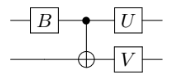

**Figura 1:** Schmidt decomposition for $2n=2$ qubits. Extracted from Ref. [4].

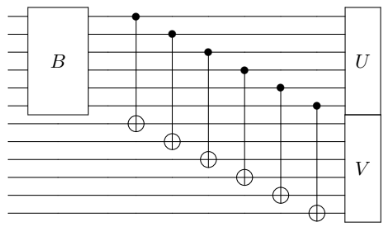

**Figure 2:** Schmidt decomposition for $2n=12$ qubits. Extracted from Ref. [4].

# Qiskit Examples

In Qiskit, when `state_vector` é passed, the quantum state is prepared based on the isometry synthesis described in [3]. Observe that `qc.initialize(state_vector, qubit)` is an instruction and not a quantum gate, since it contains a reset operation, which is not unitary.

In [11]:
# Qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter

# NumPy
import numpy as np

- 1-qubit state:

$$ |\psi\rangle = \frac{1}{\sqrt 2}(|0\rangle + |1\rangle) =  \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\1 \end{bmatrix}$$

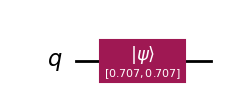

In [16]:
# Target state:
state_vector = [1/np.sqrt(2), 1/np.sqrt(2)]  # |ψ⟩ = (|0⟩ + |1⟩)/√2

# Creating a quantum circuit with 1 qubit:
qc = QuantumCircuit(1)

# Initializing the state:
qc.initialize(state_vector, 0)

qc.draw(output='mpl')  

- 2-qubit state:

$$ |\psi\rangle = \frac{1}{\sqrt 2}(|00\rangle + |01\rangle) = \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} + \frac{1}{\sqrt 2} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = \frac{1}{\sqrt 2} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix}$$

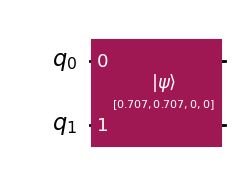

In [18]:
# Target state:
state_vector = [1/np.sqrt(2), 1/np.sqrt(2), 0, 0]  # (|00⟩ + |01⟩)/√2

# Creating a quantum circuit with 2 qubits:
qc = QuantumCircuit(2)

# Initializing the state:
qc.initialize(state_vector, [0, 1])

qc.draw(output='mpl')  

# References

[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: Cambridge Univ. Press. 10th Anniv. Ed.

[2] V. Shende, S. S. Bullock, and I. Markov, "Synthesis of quantum logic circuits," Computer-Aided Design of Integrated Circuits and Systems, IEEE Transactions on, vol. 25, pp. 1000 – 1010, July 2006.

[3] Iten et al., Quantum circuits for isometries (2016). Phys. Rev. A 93, 032318.

[4] J. Abhijith et al., Quantum Algorithm Implementations for Beginners. [arXiv:1804.03719](https://arxiv.org/abs/1804.03719)